# Download Dataset

In [ ]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print(f"#Training samples = {X_train.shape[0]}, #Testing samples = {X_test.shape[0]}.\n")

print(X_train[:10])

17464789/17464789 [==============================] - 0s 0us/step
#Training samples = 25000, #Testing samples = 25000.

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 

In [ ]:
print(X_train.shape)

(25000,)


In [ ]:
for i in range(15):
  print(f"#Elements in sample {i} are {len(X_train[i])}")

#Elements in sample 0 are 218
#Elements in sample 1 are 189
#Elements in sample 2 are 141
#Elements in sample 3 are 550
#Elements in sample 4 are 147
#Elements in sample 5 are 43
#Elements in sample 6 are 123
#Elements in sample 7 are 562
#Elements in sample 8 are 233
#Elements in sample 9 are 130
#Elements in sample 10 are 450
#Elements in sample 11 are 99
#Elements in sample 12 are 117
#Elements in sample 13 are 238
#Elements in sample 14 are 109


In [ ]:
print(y_train.shape)
print(y_train[:10])

(25000,)
[1 0 0 1 0 0 1 0 1 0]


# Format Dataset
- Since each sample can have unique number of words, padding is essential.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train, padding='post', maxlen=100)
X_test_padded = pad_sequences(X_test, padding='post', maxlen=100)

print(f"Shapes of X_train_padded and X_test_padded are = {X_train_padded.shape} and {X_test_padded.shape} respectively.\n")

Shapes of X_train_padded and X_test_padded are = (25000, 100) and (25000, 100) respectively.



In [ ]:
X_train_padded[:10]

array([[ 1415,    33,     6,    22,    12,   215,    28,    77,    52,
            5,    14,   407,    16,    82, 10311,     8,     4,   107,
          117,  5952,    15,   256,     4, 31050,     7,  3766,     5,
          723,    36,    71,    43,   530,   476,    26,   400,   317,
           46,     7,     4, 12118,  1029,    13,   104,    88,     4,
          381,    15,   297,    98,    32,  2071,    56,    26,   141,
            6,   194,  7486,    18,     4,   226,    22,    21,   134,
          476,    26,   480,     5,   144,    30,  5535,    18,    51,
           36,    28,   224,    92,    25,   104,     4,   226,    65,
           16,    38,  1334,    88,    12,    16,   283,     5,    16,
         4472,   113,   103,    32,    15,    16,  5345,    19,   178,
           32],
       [  163,    11,  3215, 10156,     4,  1153,     9,   194,   775,
            7,  8255, 11596,   349,  2637,   148,   605, 15358,  8003,
           15,   123,   125,    68, 23141,  6853,    15,   34

# ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann = Sequential()

ann.add(Dense(units=200, activation='relu', input_shape=(100,)))
ann.add(Dense(units=300, activation='elu'))
ann.add(Dense(units=150, activation='selu'))
ann.add(Dense(units=100, activation='tanh'))
ann.add(Dense(units=60, activation='elu'))
ann.add(Dense(units=1, activation='sigmoid')) # binary classification

ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 300)               60300     
                                                                 
 dense_8 (Dense)             (None, 150)               45150     
                                                                 
 dense_9 (Dense)             (None, 100)               15100     
                                                                 
 dense_10 (Dense)            (None, 60)                6060      
                                                                 
 dense_11 (Dense)            (None, 1)                 61        
                                                                 
Total params: 146871 (573.71 KB)
Trainable params: 146

In [ ]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_history = ann.fit(X_train_padded, y_train, batch_size=32, epochs=100, validation_split=(0.2), callbacks=[es, overfit_])

Epoch 1/100
625/625 [==============================] - 5s 4ms/step - loss: 0.7036 - accuracy: 0.5063 - val_loss: 0.6939 - val_accuracy: 0.5042
Epoch 2/100
625/625 [==============================] - 2s 4ms/step - loss: 0.6988 - accuracy: 0.4951 - val_loss: 0.6932 - val_accuracy: 0.5062
Epoch 3/100
625/625 [==============================] - 2s 4ms/step - loss: 0.6983 - accuracy: 0.4987 - val_loss: 0.7040 - val_accuracy: 0.5062
Epoch 4/100
625/625 [==============================] - 3s 4ms/step - loss: 0.6991 - accuracy: 0.4994 - val_loss: 0.6988 - val_accuracy: 0.5062
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6956 - accuracy: 0.5027 - val_loss: 0.6938 - val_accuracy: 0.5062
Epoch 6/100
625/625 [==============================] - 2s 4ms/step - loss: 0.6957 - accuracy: 0.4999 - val_loss: 0.7107 - val_accuracy: 0.5062
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 0.6953 - accuracy: 0.5001 - val_loss: 0.6942 - val_accuracy: 0.5062

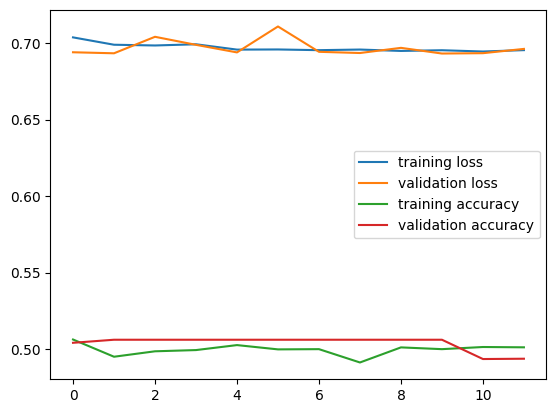

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(ann_history.history['loss'])), ann_history.history['loss'], label='training loss')
plt.plot(range(len(ann_history.history['loss'])), ann_history.history['val_loss'], label='validation loss')
plt.plot(range(len(ann_history.history['loss'])), ann_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(ann_history.history['loss'])), ann_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred = ann.predict(X_test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred[:10]

782/782 [==============================] - 2s 2ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

Accuracy for test set is 0.5


## Problem
- a problem that could've occurred is that the integer encoding could cause some *features* to blow up in value, against others that have smaller integer-value on being encoded.
- hence we might need to normalize across each feature.

## ANN with normalized integer-encoded words.
- normalize for each of the 100 words, across each sample.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_padded_scaled = scaler.fit_transform(X_train_padded)
X_test_padded_scaled = scaler.transform(X_test_padded)

In [ ]:
ann_normalized = Sequential()

ann_normalized.add(Dense(units=200, activation='relu', input_shape=(100,)))
ann_normalized.add(Dense(units=300, activation='elu'))
ann_normalized.add(Dense(units=150, activation='selu'))
ann_normalized.add(Dense(units=100, activation='tanh'))
ann_normalized.add(Dense(units=60, activation='elu'))
ann_normalized.add(Dense(units=1, activation='sigmoid')) # binary classification

ann_normalized.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 300)               60300     
                                                                 
 dense_8 (Dense)             (None, 150)               45150     
                                                                 
 dense_9 (Dense)             (None, 100)               15100     
                                                                 
 dense_10 (Dense)            (None, 60)                6060      
                                                                 
 dense_11 (Dense)            (None, 1)                 61        
                                                                 
Total params: 146871 (573.71 KB)
Trainable params: 146

In [ ]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

ann_normalized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

ann_normalized_history = ann_normalized.fit(X_train_padded_scaled, y_train, batch_size=32, epochs=100, validation_split=(0.2), callbacks=[es, overfit_])

Epoch 1/100
625/625 [==============================] - 5s 4ms/step - loss: 0.7029 - accuracy: 0.4983 - val_loss: 0.6975 - val_accuracy: 0.4966
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6938 - accuracy: 0.5191 - val_loss: 0.6962 - val_accuracy: 0.5086
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 0.6890 - accuracy: 0.5437 - val_loss: 0.6928 - val_accuracy: 0.5238
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 0.6854 - accuracy: 0.5533 - val_loss: 0.6991 - val_accuracy: 0.5128
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 0.6803 - accuracy: 0.5613 - val_loss: 0.6953 - val_accuracy: 0.5216
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 0.6694 - accuracy: 0.5870 - val_loss: 0.7032 - val_accuracy: 0.5264
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.6536 - accuracy: 0.6072 - val_loss: 0.7272 - val_accuracy: 0.5158

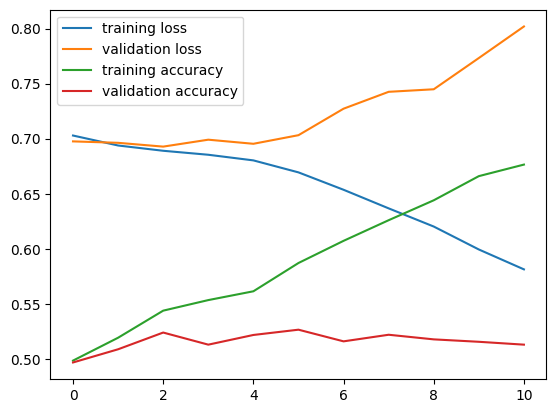

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['loss'], label='training loss')
plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['val_loss'], label='validation loss')
plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(ann_normalized_history.history['loss'])), ann_normalized_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred = ann_normalized.predict(X_test_padded_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred[:10]

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 2s 2ms/step
Accuracy for test set is 0.51136


# RNN (with padding)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN

rnn = Sequential()
rnn.add(SimpleRNN(units=80, input_shape=(100,1)))
rnn.add(Dense(units=1, activation='sigmoid'))

print(rnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 80)                6560      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 6641 (25.94 KB)
Trainable params: 6641 (25.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

In [ ]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn.fit(X_train_padded, y_train, epochs=100, batch_size=32, callbacks=[es, overfit_], validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 18s 26ms/step - loss: 0.6980 - accuracy: 0.5038 - val_loss: 0.6938 - val_accuracy: 0.5086
Epoch 2/100
625/625 [==============================] - 17s 27ms/step - loss: 0.6951 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4978
Epoch 3/100
625/625 [==============================] - 15s 24ms/step - loss: 0.6957 - accuracy: 0.5051 - val_loss: 0.6924 - val_accuracy: 0.5184
Epoch 4/100
625/625 [==============================] - 17s 27ms/step - loss: 0.6951 - accuracy: 0.5109 - val_loss: 0.6946 - val_accuracy: 0.5172
Epoch 5/100
625/625 [==============================] - 15s 25ms/step - loss: 0.6948 - accuracy: 0.5099 - val_loss: 0.6933 - val_accuracy: 0.5154
Epoch 6/100
625/625 [==============================] - 17s 27ms/step - loss: 0.6939 - accuracy: 0.5106 - val_loss: 0.6926 - val_accuracy: 0.5068
Epoch 7/100
625/625 [==============================] - 17s 27ms/step - loss: 0.6947 - accuracy: 0.5066 - val_loss: 0.6915 - val_ac

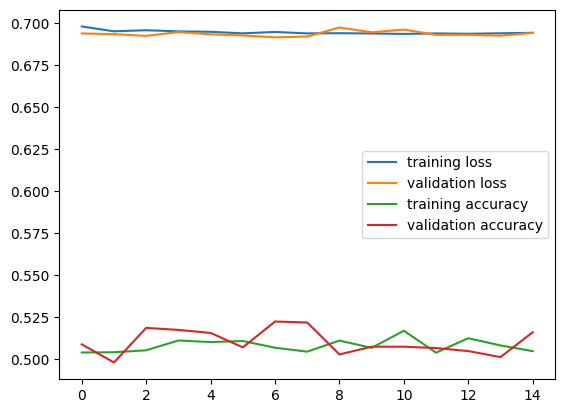

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['loss'], label='training loss')
plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['val_loss'], label='validation loss')
plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(rnn_history.history['loss'])), rnn_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred = rnn.predict(X_test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 11s 14ms/step
Accuracy for test set is 0.51396


# RNN (without padding)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Masking

import numpy as np

x_train_max_pad = pad_sequences(X_train, padding='post', dtype='float32')

rnn_varying_seq = Sequential()

rnn_varying_seq.add(Masking(mask_value=0., input_shape=(None, 1)))
rnn_varying_seq.add(SimpleRNN(units=64, activation='relu'))
rnn_varying_seq.add(Dense(units=1, activation='sigmoid'))

rnn_varying_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_varying_seq.fit(x_train_max_pad[:, :, np.newaxis], y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 494s 785ms/step - loss: 32.4239 - accuracy: 0.5025 - val_loss: 16.0764 - val_accuracy: 0.4964
Epoch 2/5
625/625 [==============================] - 533s 853ms/step - loss: 11.7418 - accuracy: 0.4947 - val_loss: 12.6565 - val_accuracy: 0.5096
Epoch 3/5
625/625 [==============================] - 488s 780ms/step - loss: 9.7794 - accuracy: 0.5013 - val_loss: 7.1826 - val_accuracy: 0.5074
Epoch 4/5
625/625 [==============================] - 494s 791ms/step - loss: 9.7953 - accuracy: 0.5023 - val_loss: 6.6394 - val_accuracy: 0.4956
Epoch 5/5
625/625 [==============================] - 496s 794ms/step - loss: 6.4077 - accuracy: 0.4983 - val_loss: 9.7109 - val_accuracy: 0.5030


In [ ]:
print(rnn_varying_seq.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 1)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
print(x_train_max_pad.shape)

(25000, 2494)


That's why such a longer training time.

In [ ]:
import numpy as np

X_test_padded_max_train_length = pad_sequences(X_test, padding='post', dtype='float32', maxlen=2494)
y_pred = rnn_varying_seq.predict(X_test_padded_max_train_length)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 206s 263ms/step
Accuracy for test set is 0.49704


# Vector embedding
- used to create dense vectors
  - padding used for a shorter length(100 in the above 2 sections) leaves a lot of valuable information
  - padding used w.r.t. the longest review makes the word vector sparse for a lot of other reviews (sparse means most of those feature values will be 0).
  - dense vectors on the other hand mostly have non-zero feature value.

## ANN

In [ ]:
from keras.layers import Embedding, SimpleRNN, Dense, GlobalAveragePooling1D
from keras.models import Sequential

ann_embedding = Sequential()

ann_embedding.add(Embedding(input_dim=10000, output_dim=2)) # input_dim = vocabulary size, output_dim = embed vector size

# observe the output shape, its rank is 3, i.e. 3 elements in the output shape tuple
# need to convert it into 2-ranked so that the further Dense layers can yield a 2-rank output
# Reduce the rank of the output using GlobalAveragePooling1D
ann_embedding.add(GlobalAveragePooling1D())

ann_embedding.add(Dense(units=200, activation='relu'))
ann_embedding.add(Dense(units=150, activation='selu'))
ann_embedding.add(Dense(units=100, activation='tanh'))
ann_embedding.add(Dense(units=60, activation='elu'))
ann_embedding.add(Dense(units=1, activation='sigmoid')) # binary classification

ann_embedding.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 2)           20000     
                                                                 
 global_average_pooling1d (  (None, 2)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_13 (Dense)            (None, 200)               600       
                                                                 
 dense_14 (Dense)            (None, 150)               30150     
                                                                 
 dense_15 (Dense)            (None, 100)               15100     
                                                                 
 dense_16 (Dense)            (None, 60)                6060      
                                                      

In [ ]:
ann_embedding.layers[-1].output.shape

TensorShape([None, 1])

In [ ]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

In [ ]:
ann_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import numpy as np
ann_embedding_history = ann_embedding.fit(X_train_padded, y_train, epochs=100, batch_size=64, callbacks = [es, overfit_], validation_split=0.2)

Epoch 1/100
313/313 [==============================] - 32s 97ms/step - loss: 0.4905 - accuracy: 0.7363 - val_loss: 0.3595 - val_accuracy: 0.8368
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.2782 - accuracy: 0.8850 - val_loss: 0.3553 - val_accuracy: 0.8456
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.2193 - accuracy: 0.9158 - val_loss: 0.3819 - val_accuracy: 0.8362
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.1801 - accuracy: 0.9333 - val_loss: 0.4305 - val_accuracy: 0.8336
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.1483 - accuracy: 0.9470 - val_loss: 0.4781 - val_accuracy: 0.8238
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.1247 - accuracy: 0.9592 - val_loss: 0.5389 - val_accuracy: 0.8266
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.1113 - accuracy: 0.9635 - val_loss: 0.5427 - val_accuracy

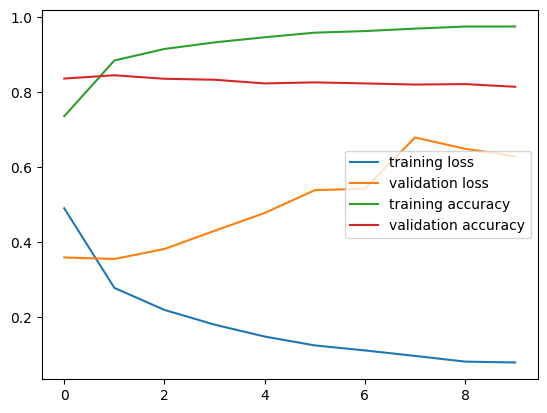

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(ann_embedding_history.history['loss'])), ann_embedding_history.history['loss'], label='training loss')
plt.plot(range(len(ann_embedding_history.history['loss'])), ann_embedding_history.history['val_loss'], label='validation loss')
plt.plot(range(len(ann_embedding_history.history['loss'])), ann_embedding_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(ann_embedding_history.history['loss'])), ann_embedding_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred = ann_embedding.predict(X_test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 1s 2ms/step
Accuracy for test set is 0.81272


## RNN

In [ ]:
from keras.layers import Embedding, SimpleRNN, Dense
from keras.models import Sequential

rnn_embedding = Sequential()
rnn_embedding.add(Embedding(input_dim=10000, output_dim=3)) # input_dim = vocabulary size, output_dim = embed vector size
rnn_embedding.add(SimpleRNN(units=30))
rnn_embedding.add(Dense(1, activation='sigmoid'))

rnn_embedding.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 3)           30000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30)                1020      
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 31051 (121.29 KB)
Trainable params: 31051 (121.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rnn_embedding.layers[-1].output.shape

TensorShape([None, 1])

In [ ]:
from keras.callbacks import EarlyStopping, Callback

class OverfitDetector(Callback):

  def __init__(self, patience=0):
    super(OverfitDetector, self).__init__()
    self.patience = patience
    self.wait = 0
    self.best_train_loss = float('inf')
    self.best_val_loss = float('inf')

  def on_epoch_end(self, epoch, logs=None):
    current_val_loss = logs.get('val_loss')
    current_train_loss = logs.get('loss')

    self.best_train_loss = min(self.best_train_loss, current_train_loss)

    if current_val_loss < self.best_val_loss:
      # validation loss gone down, improvement in model observed in this epoch
      self.best_val_loss = current_val_loss
      self.wait = 0
    else:
      # validation loss stayed same/gone higher
      # possible overfitting
      self.wait += 1
      if self.wait >= self.patience:
          print(f"\nEpoch {epoch + 1}: Overfitting detected! Stopping training.")
          self.model.stop_training = True

# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
overfit_ = OverfitDetector(patience=8)

In [ ]:
rnn_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

rnn_embedding_history = rnn_embedding.fit(X_train_padded, y_train, epochs=100, batch_size=64, callbacks = [es, overfit_], validation_split=0.2)

Epoch 1/100
313/313 [==============================] - 58s 181ms/step - loss: 0.6907 - accuracy: 0.5312 - val_loss: 0.6845 - val_accuracy: 0.5576
Epoch 2/100
313/313 [==============================] - 37s 118ms/step - loss: 0.5983 - accuracy: 0.6745 - val_loss: 0.4702 - val_accuracy: 0.7908
Epoch 3/100
313/313 [==============================] - 32s 103ms/step - loss: 0.3903 - accuracy: 0.8342 - val_loss: 0.4297 - val_accuracy: 0.8164
Epoch 4/100
313/313 [==============================] - 32s 102ms/step - loss: 0.2876 - accuracy: 0.8868 - val_loss: 0.4394 - val_accuracy: 0.8290
Epoch 5/100
313/313 [==============================] - 30s 95ms/step - loss: 0.2208 - accuracy: 0.9193 - val_loss: 0.4668 - val_accuracy: 0.8282
Epoch 6/100
313/313 [==============================] - 30s 97ms/step - loss: 0.1771 - accuracy: 0.9378 - val_loss: 0.4629 - val_accuracy: 0.8288
Epoch 7/100
313/313 [==============================] - 28s 90ms/step - loss: 0.1389 - accuracy: 0.9538 - val_loss: 0.5504 - va

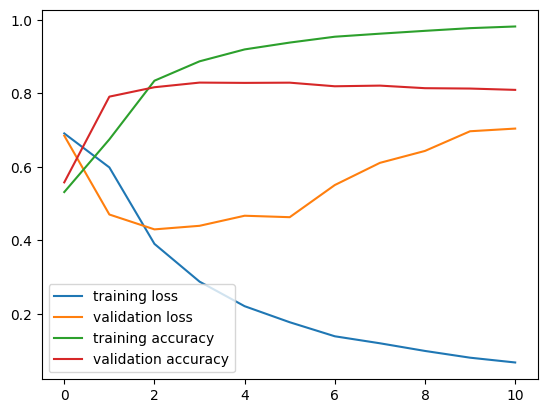

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(rnn_embedding_history.history['loss'])), rnn_embedding_history.history['loss'], label='training loss')
plt.plot(range(len(rnn_embedding_history.history['loss'])), rnn_embedding_history.history['val_loss'], label='validation loss')
plt.plot(range(len(rnn_embedding_history.history['loss'])), rnn_embedding_history.history['accuracy'], label='training accuracy')
plt.plot(range(len(rnn_embedding_history.history['loss'])), rnn_embedding_history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred = rnn_embedding.predict(X_test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

print(f"Accuracy for test set is {accuracy_score(y_test, y_pred)}")

782/782 [==============================] - 7s 8ms/step
Accuracy for test set is 0.80732


# Compare performances
- of all 4 types of networks
  - ANN with integer encoding
  - RNN with integer encoding
  - ANN with vector embeddings
  - RNN with vector embeddings

In [ ]:
import pandas as pd
import numpy as np

y_pred_ann = ann.predict(X_test_padded)
y_pred_ann = np.where(y_pred_ann >= 0.5, 1, 0)

y_pred_rnn = rnn.predict(X_test_padded)
y_pred_rnn = np.where(y_pred_rnn >= 0.5, 1, 0)

y_pred_ann_embedding = ann_embedding.predict(X_test_padded)
y_pred_ann_embedding = np.where(y_pred_ann_embedding >= 0.5, 1, 0)

y_pred_rnn_embedding = rnn_embedding.predict(X_test_padded)
y_pred_rnn_embedding = np.where(y_pred_rnn_embedding >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score

accuracy_df = pd.DataFrame({
    'Model Name': ['ANN', 'RNN', 'ANN with embeddings', 'RNN with embeddings'],
    'Accuracy Scores': [accuracy_score(y_test, y_pred_ann), accuracy_score(y_test, y_pred_rnn), accuracy_score(y_test, y_pred_ann_embedding), accuracy_score(y_test, y_pred_rnn_embedding)]
})

display(accuracy_df)

782/782 [==============================] - 8s 10ms/step


,Model Name,Accuracy Scores
0,ANN,0.50000
1,RNN,0.51396
2,ANN with embeddings,0.81272
3,RNN with embeddings,0.80732


# Inferences and Conclusion
- **RNN also (just like ANNs) really can't handle varying input sequences.**
  - we end up padding the training data to `max_length_in_train`, which turns out to be a lot, thus making the encoded vector sparse in nature.
  - additionally, if a test sequence having length greater than `max_length_in_train` is given to the model, we would've to modify the predict method s.t. it predicts this longer test sequence in segments, wherein output of i'th segment is sent to the SimpleRNN layer for computing the (i+1)'th segment, till all segments exhaust.
  - hence, its **more convenient** to just **pad both train and test sequences at a constant fixed length**.
- **Embedding layer improves the performance substantially**
- **Vector embeddings improves performance regardless of the model being an ANN or an RNN**
- **RNN** is **better than ANN** only due to very fewer params to gain the same accuracy/loss , hence the lesser computations/training time.